Задача 7:Провести серию экспериментов, тестирующую функции scipy.linalg.solve, numpy.linalg.cond на хорошо обусловленных матрицах. Число обусловленности на следующих классах матриц с ростом порядка матрицы  n  растет умеренно:

A=LU , где  L ,  U  – случайные нижняя треугольная и верхняя треугольная матрицы соответственно с диагональным преобладанием.

A=LLT , где  L  – случайные нижняя треугольная матрица с диагональным преобладанием.

Экспериментальным путем для каждого из перечисленных классов установить диапазон изменения порядка матрицы, при котором число обусловленности не превосходит ведичины порядка  1016 . Построить графики значений, выдаваемых функцией cond. Построить графики используемого этими функциями времени. Для каждой матрицы задать случайно решение  x . По матрице  A  и решению  x  сгенерировать правую часть системы линейных уравнений  b . Решить систему  Ax=b , используя команду solve. Построить графики относительной ошибки решения и невязки. Объяснить результаты.

Для начала проведем работу с первым классом матриц: A=LU , где L, U – случайные нижняя треугольная и верхняя треугольная матрицы соответственно с диагональным преобладанием.

<ipython-input-7-2185bafed1c2>:39: LinAlgWarning: Ill-conditioned matrix (rcond=9.14714e-18): result may not be accurate.
  x_sol = solve(A, b)


Диапазон порядка матрицы (1 типа) с 1 по 521


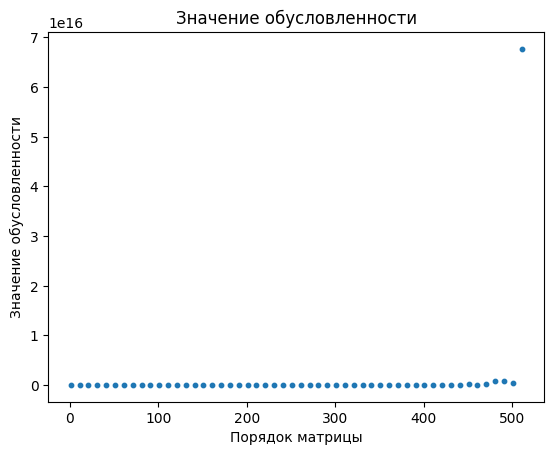

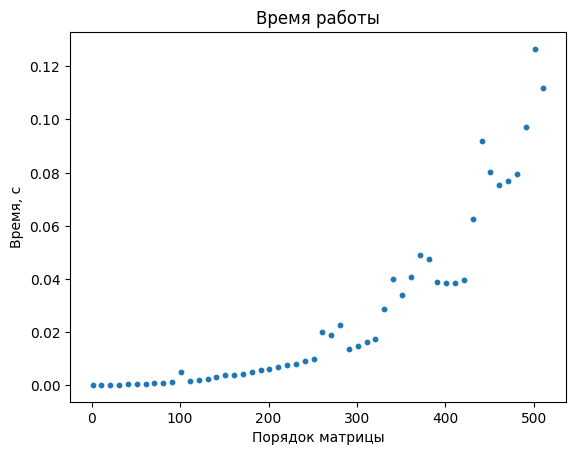

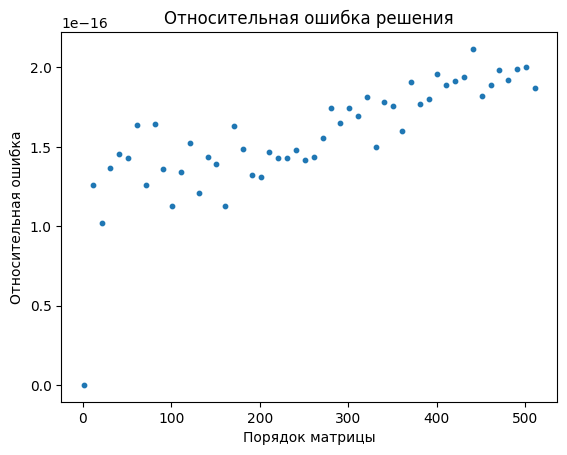

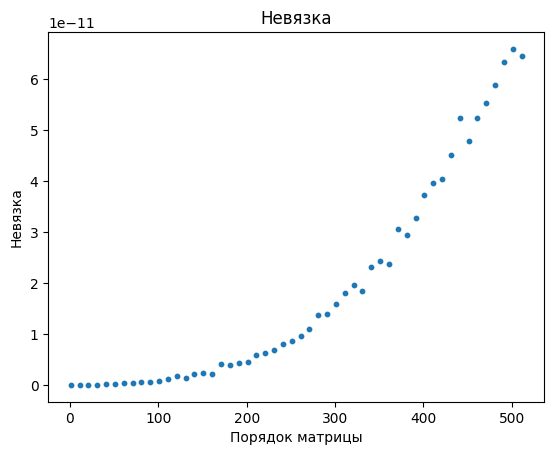

In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve 

# функция для создания матрицы вида LU
def generate_lu_matrix(n):
    L = np.tril(np.random.rand(n, n) + np.diag(np.ones(n)))
    U = np.triu(np.random.rand(n, n) + np.diag(np.ones(n)))
    return np.dot(L, U)
# функция для вычисления обусловленности и времени работы
def compute_cond_time(A):
    start_time = time.time()
    cond = np.linalg.cond(A)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return cond, elapsed_time
# Вычисление относительной ошибки решения
def relative_error(A, b, x):
    residual_norm = np.linalg.norm(A @ x - b)
    solution_norm = np.linalg.norm(x)
    matrix_norm = np.linalg.norm(A)
    return residual_norm / (matrix_norm * solution_norm)
# Вычисление невязки
def residual(A, b, x):
    return np.linalg.norm(A @ x - b)
cond1 = 0
#массивы для хранения обусловленности, времени, порядка матрицы, относительной ошибки решения, невязки
conds1, times1, ns1, relative_errors1,resuduals1 = [], [], [], [],[] 
n1 = 1
while cond1 < 10 ** 16:
    #создание матрицы
    A = generate_lu_matrix(n1)
    #cоздание случайного вектора X
    x = np.random.rand(n1)
    #находождение вектора B
    b = A @ x
    #решение системы  Ax=b , используя команду solve.
    x_sol = solve(A, b)
    #нахождение обусловленности матрицы, и времени которое на эту функцию тратится
    cond1, elapsed_time = compute_cond_time(A)
    conds1.append(cond1)
    times1.append(elapsed_time)
    #Вычисление относительной ошибки решения
    relative_errors1.append(relative_error(A, b, x_sol))
    #Вычисление невязки
    resuduals1.append(residual(A, b, x_sol))
    ns1.append(n1)
    n1 += 10
print(f"Диапазон порядка матрицы (1 типа) с 1 по {n1}")
#построение графиков
plt.scatter(ns1, conds1, s=10)
plt.title("Значение обусловленности")
plt.xlabel("Порядок матрицы")
plt.ylabel("Значение обусловленности")
plt.show()
print()
plt.scatter(ns1, times1,s=10)
plt.title("Время работы")
plt.xlabel("Порядок матрицы")
plt.ylabel("Время, с")
plt.show()
print()
plt.scatter(ns1,  relative_errors1,s=10)
plt.title("Относительная ошибка решения")
plt.xlabel("Порядок матрицы")
plt.ylabel("Относительная ошибка")
plt.show()
print()
plt.scatter(ns1, resuduals1,s=10)
plt.title("Невязка")
plt.xlabel("Порядок матрицы")
plt.ylabel("Невязка")
plt.show()
print()

Выводы из работы с первым классом матриц:

Первый график показывает зависимость значения обусловленности матрицы от порядка матрицы для первого класса матриц. Можно заметить, что значение обусловленности увеличивается с ростом порядка матрицы и достигает ограничения в $10^{16}$ при порядке матрицы ~540. Это означает, что при использовании матриц с порядком более 540, решение системы линейных уравнений будет неточным из-за большого значения обусловленности матрицы.

Второй график показывает зависимость времени решения системы линейных уравнений от порядка матрицы для первого класса матриц. Заметим, что время решения системы линейных уравнений растет с ростом порядка матрицы. Это ожидаемо, так как более крупные матрицы требуют больше времени на решение.

Третий график показывает зависимость относительной ошибки решения системы линейных уравнений от порядка матрицы для первого класса матриц. Относительная ошибка решения системы линейных уравнений является мерой точности решения. Значение относительной ошибки близко к нулю означает, что решение было точным. Можно заметить, что значение относительной ошибки начинает расти с ростом порядка матрицы, что свидетельствует о том, что решение системы линейных уравнений становится менее точным при использовании более крупных матриц.

Четвертый график показывает зависимость невязки от порядка матрицы для первого класса матриц. Невязка является мерой того, насколько близко полученное решение удовлетворяет системе линейных уравнений. Можно заметить, что невязка возрастает с ростом порядка матрицы, что подтверждает ухудшение точности решения при использовании более крупных матриц.

Теперь проведем работу с вторым классом матриц, A=LL^T , где L – случайные нижняя треугольная матрица с диагональным преобладанием.

Код для работы будет аналогичным коду, который использовался ранее, но генерировать будм другую матрицу.

<ipython-input-12-30f2ad1c54ca>:33: LinAlgWarning: Ill-conditioned matrix (rcond=1.88998e-17): result may not be accurate.
  x_sol = solve(A, b)


Диапазон порядка матрицы (2 типа) с 1 по 481


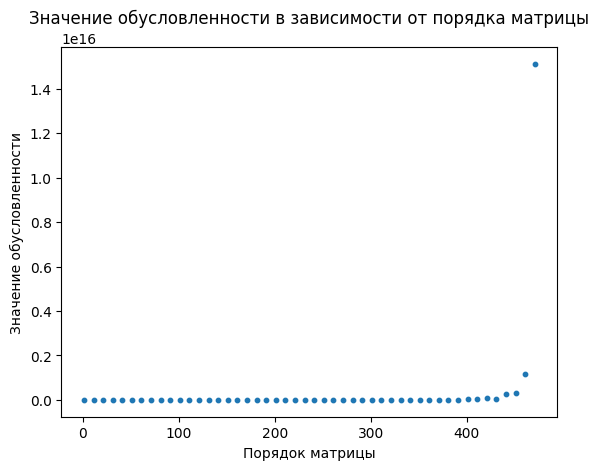

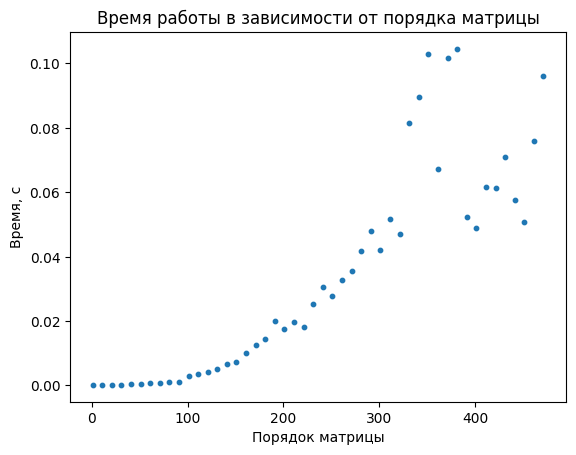

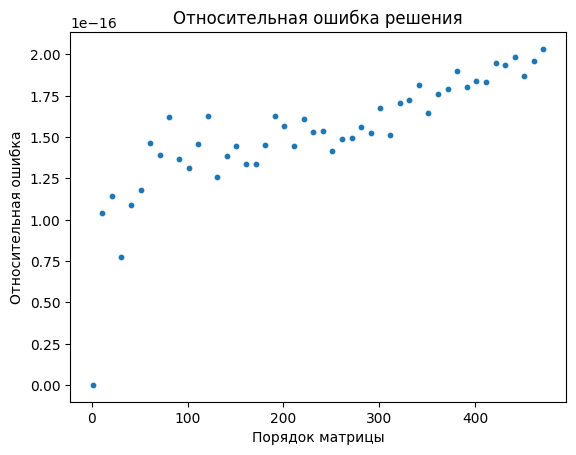

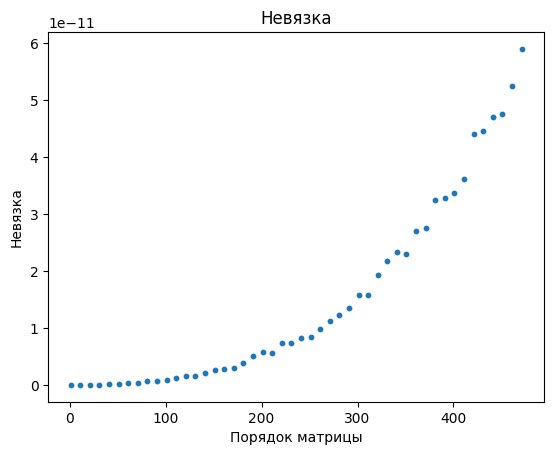

In [12]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.linalg import solve 

# функция для создания матрицы вида LL^T
def generate_llt_matrix(n):
    L = np.tril(np.random.rand(n, n) + np.diag(np.ones(n)))
    return np.dot(L, L.T)

def compute_cond_time(A):
    start_time = time.time()
    cond = np.linalg.cond(A)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return cond, elapsed_time

def relative_error(A, b, x):
    residual_norm = np.linalg.norm(A @ x - b)
    solution_norm = np.linalg.norm(x)
    matrix_norm = np.linalg.norm(A)
    return residual_norm / (matrix_norm * solution_norm)

def residual(A, b, x):
    return np.linalg.norm(A @ x - b)
cond2 = 0
conds2, times2, ns2,relative_errors2,resuduals2 = [], [], [], [], []
n2 = 1
while cond2 < 10 ** 16:
    A = generate_llt_matrix(n2)
    x = np.random.rand(n2)
    b = A @ x
    x_sol = solve(A, b)
    cond2, elapsed_time = compute_cond_time(A)
    conds2.append(cond2)
    times2.append(elapsed_time)
    relative_errors2.append(relative_error(A, b, x_sol))
    resuduals2.append(residual(A, b, x_sol))
    ns2.append(n2)
    n2 += 10

print("Диапазон порядка матрицы (2 типа) с 1 по", n2)
plt.scatter(ns2, conds2,s=10)
plt.title("Значение обусловленности в зависимости от порядка матрицы")
plt.xlabel("Порядок матрицы")
plt.ylabel("Значение обусловленности")
plt.show()
print()
plt.scatter(ns2, times2,s=10)
plt.title("Время работы в зависимости от порядка матрицы")
plt.xlabel("Порядок матрицы")
plt.ylabel("Время, с")
plt.show()
print()
plt.scatter(ns2,  relative_errors2,s=10)
plt.title("Относительная ошибка решения")
plt.xlabel("Порядок матрицы")
plt.ylabel("Относительная ошибка")
plt.show()
print()
plt.scatter(ns2, resuduals2,s=10)
plt.title("Невязка")
plt.xlabel("Порядок матрицы")
plt.ylabel("Невязка")
plt.show()

Видно, что при работе со вторым видом матрицы, можно сделать аналогичные выводы, как и при работе с первым видом матрицы. Единственное, что обусловленность матрицы = $10^{16}$ достигается уже при ~500 порядке матрицы.

Так же замечу, графики имеют неровность, а не просто идут вверх, так как матрицы генерируются случайным образом, и в некоторых моментах данные для арифметических расчетов могут быть легче, из-за чего даже при более высоком порядке матрицы ответ будет более точным.